## Introduction
### • The data represents what should be a survey composed of customers from an airline, within which we can find data such as gender, age, and characteristics of the flight taken.
### • Initially, an exploratory data analysis (EDA) will be conducted to identify a correlation between the characteristics of the person and the type of flight with the satisfaction index.
### • A classification model will then be created to predict, given certain features, the type of satisfaction.

### Import libraries

In [86]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [87]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

### Import Train and Test DataFrame

In [88]:
path = "\\"

In [89]:
df_train = pd.read_csv(filepath_or_buffer=path+"train.csv",index_col=0)

In [90]:
df_test = pd.read_csv(filepath_or_buffer=path+"test.csv",index_col=0)

### Preliminary analysis (.describe, .info) and check NaN

In [91]:
df_train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [93]:
df_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [94]:
# Select rows containing at least one NaN value
rows_w_nan = df_train[df_train.isna().any(axis=1)]

# Print rows with NaN values
rows_w_nan

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,satisfied


### Gestione NaN

### 1. Removing rows with NaN values

In [95]:
#df_train.dropna(subset="Arrival Delay in Minutes",inplace=True)

### 2. Replacing with mode, mean, median, or a fixed value

#### 2.1 Mode

In [96]:
#mode1 = df_train['Arrival Delay in Minutes'].mode()
#df_train['Arrival Delay in Minutes'].fillna(mode1, inplace=True)

#### 2.2 Mean

In [97]:
#mean1 = round(df_train['Arrival Delay in Minutes'].mean())
#df_train['Arrival Delay in Minutes'].fillna(mean1, inplace=True)

#### 2.3 Median

In [98]:
#median1 = df_train['Arrival Delay in Minutes'].median()
#df_train['Arrival Delay in Minutes'].fillna(median1, inplace=True)

#### 2.4 Fixed Value

In [99]:
#df_train['Arrival Delay in Minutes'].fillna(0, inplace=True)

In [100]:
# The same method chosen will then also be applied on the test section

In [101]:
"""
The final decision was to completely remove the "Arrival Delay in Minutes" column since it was less populated than the
corresponding column on departure delay and had a very high correlation with it.
"""

In [102]:
# Drop "Arrival Delay" column
df_train.drop("Arrival Delay in Minutes",axis=1, inplace=True)

# EDA

### Analysis of feature correlation with graph

C:\Users\worme\AppData\Local\Temp\ipykernel_4104\1808891198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot = True,fmt = ".2f",cbar = True,)


<Axes: >

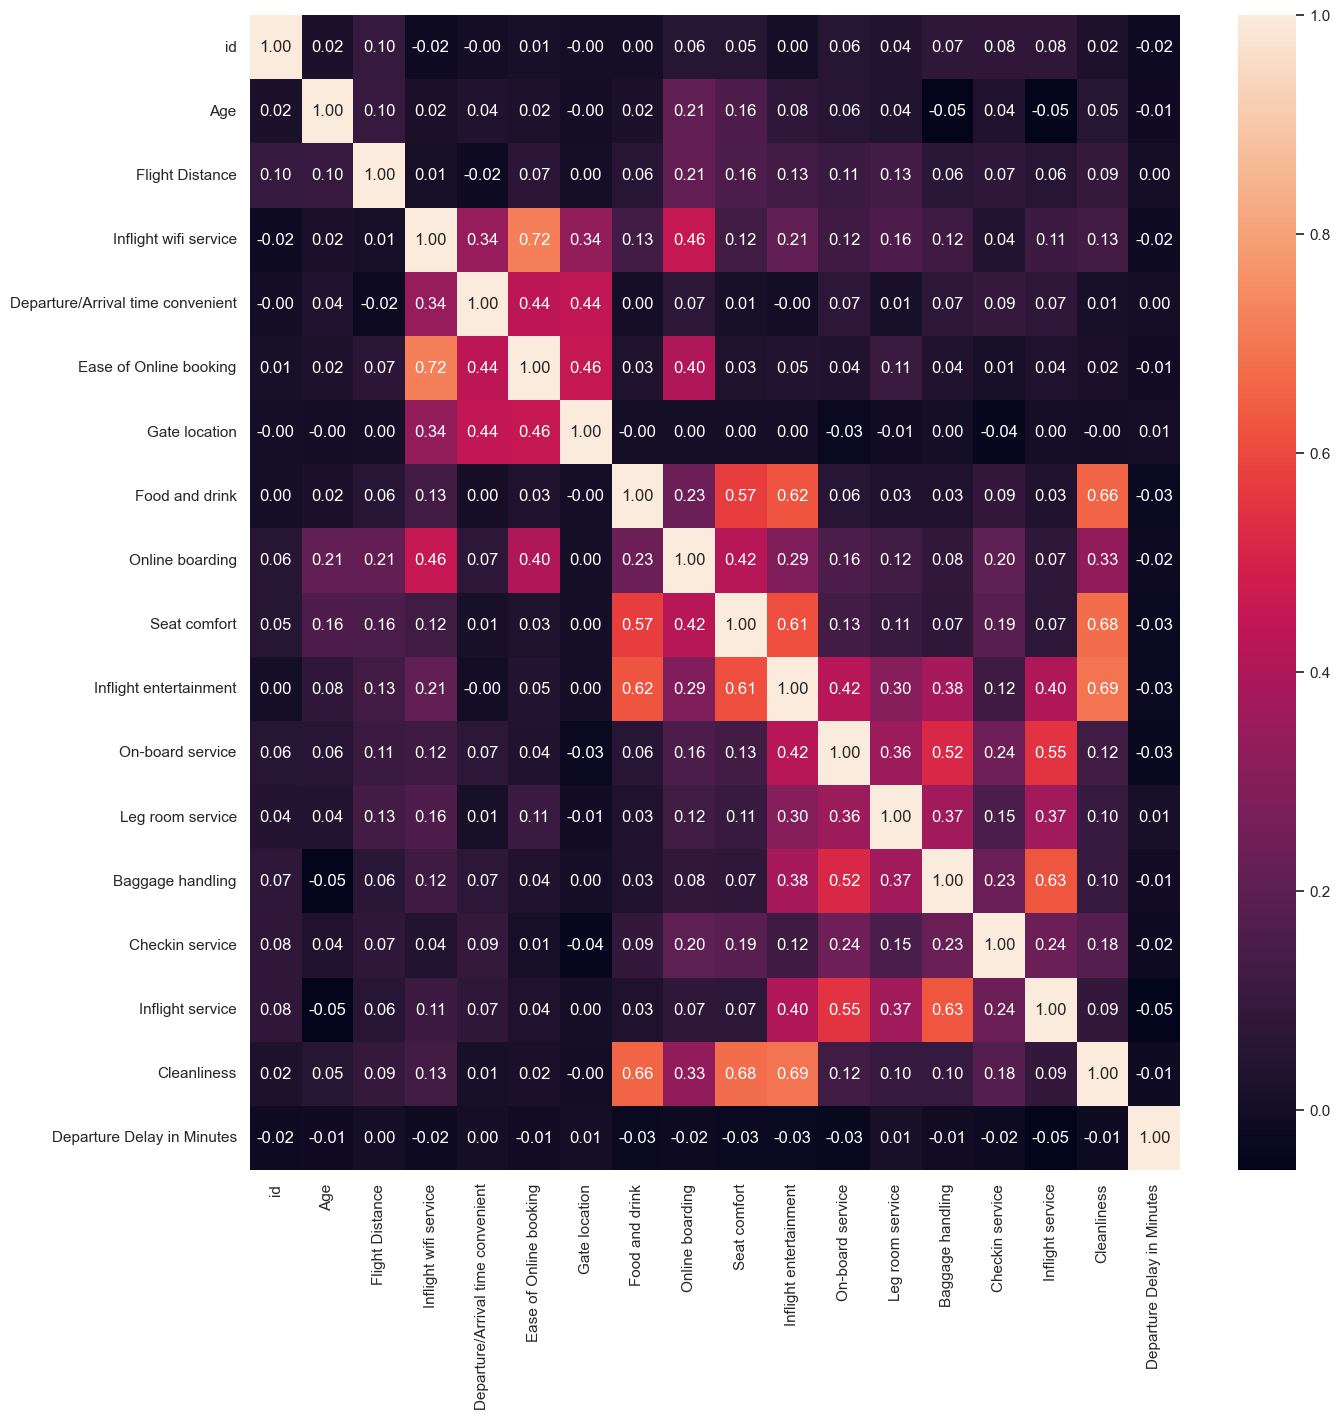

In [103]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot = True,fmt = ".2f",cbar = True,)

In [104]:
# We can notice a very high correlation between departure and arrival delays

### Evidenziamo le correlazioni più rilevanti

In [105]:
# Calculate the correlation matrix.
correlations = df_train.corr()

# Print pairs of features with a correlation greater than 0.6.
for colonna in correlations.columns:
    for riga in correlations.index:
        if abs(correlations.loc[riga, colonna]) > 0.6 and riga != colonna:
            print(f"The correlation between {riga} and {colonna} is {correlations.loc[riga, colonna]:.2f}")

La correlazione tra Ease of Online booking e Inflight wifi service è 0.72
La correlazione tra Inflight wifi service e Ease of Online booking è 0.72
La correlazione tra Inflight entertainment e Food and drink è 0.62
La correlazione tra Cleanliness e Food and drink è 0.66
La correlazione tra Inflight entertainment e Seat comfort è 0.61
La correlazione tra Cleanliness e Seat comfort è 0.68
La correlazione tra Food and drink e Inflight entertainment è 0.62
La correlazione tra Seat comfort e Inflight entertainment è 0.61
La correlazione tra Cleanliness e Inflight entertainment è 0.69
La correlazione tra Inflight service e Baggage handling è 0.63
La correlazione tra Baggage handling e Inflight service è 0.63
La correlazione tra Food and drink e Cleanliness è 0.66
La correlazione tra Seat comfort e Cleanliness è 0.68
La correlazione tra Inflight entertainment e Cleanliness è 0.69


C:\Users\worme\AppData\Local\Temp\ipykernel_4104\1651966804.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlazioni = df_train.corr()


### Dividing Age into bins and graph of satisfaction related to age bins

In [106]:
# Divide the 'Age' column into 5-year intervals and create a new column 'Age_bin'
bins = range(0, df_train['Age'].max() + 5, 5)
labels = [f'{i}-{i + 4}' for i in bins[:-1]]
df_train['Age_bin'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)

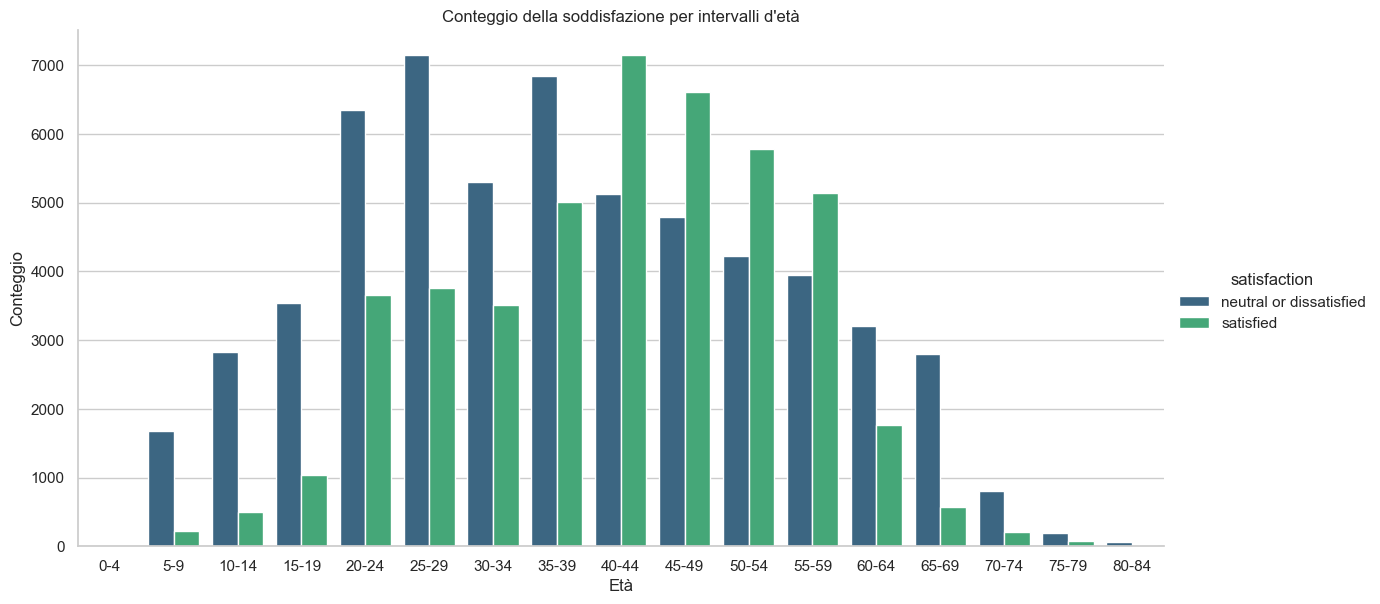

In [107]:
# Create a bar chart showing the count of 'satisfied' and 'neutral or dissatisfied' for each age range.
sns.catplot(
    data=df_train,
    x='Age_bin', # Age intervals column on the x-axis
    hue='satisfaction', # Differentiates bars by satisfaction
    kind='count', # Chart type: count of occurrences
    palette='viridis', # Color schema
    height=6, # Chart height
    aspect=2, # Ratio between width and height
)

# Set the axis titles and the chart title
plt.xlabel('Età')
plt.ylabel('Conteggio')
plt.title("Conteggio della soddisfazione per intervalli d'età")

# Show chart
plt.show()

In [108]:
##We can observe a high level of dissatisfaction in the age groups ranging from 5-39 years and from 60-84 years

### Graphical representation of the correlation between categorical variables and the level of satisfaction

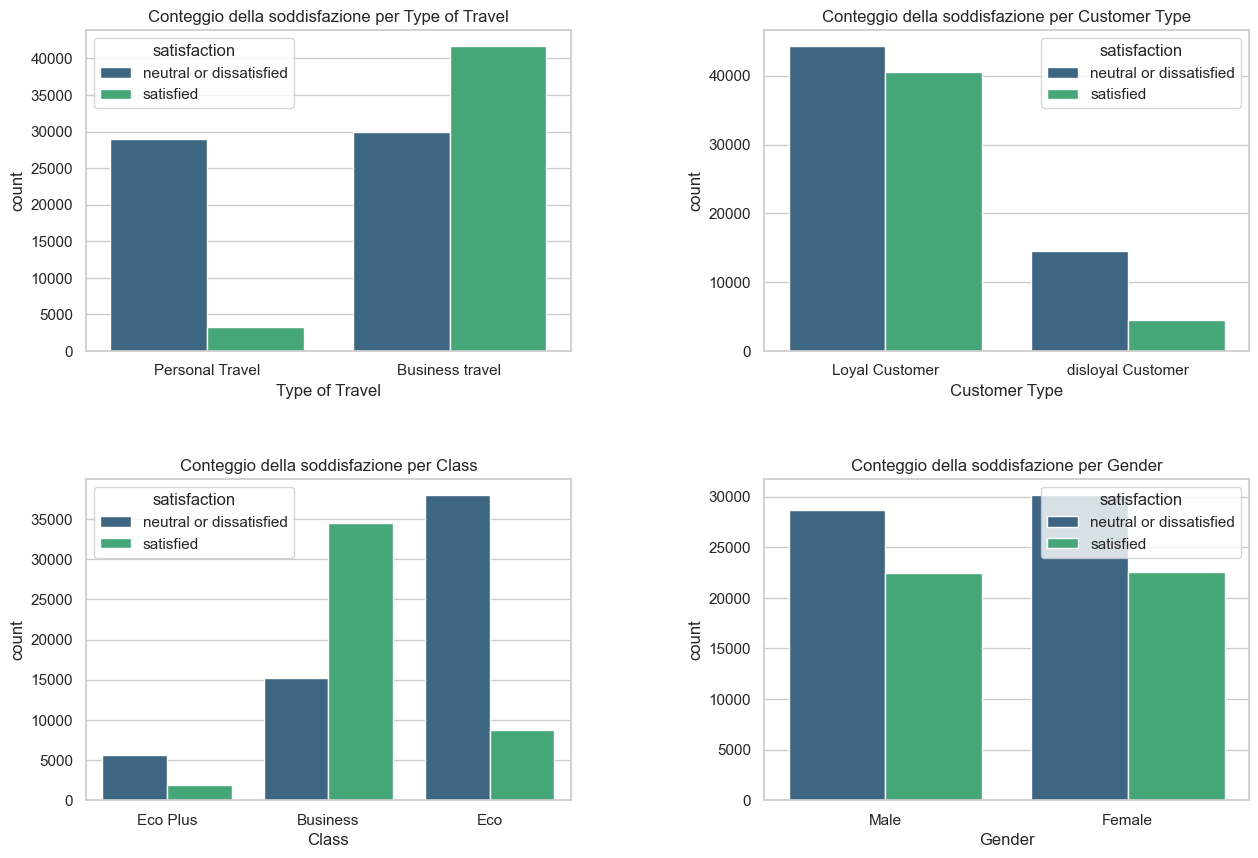

In [109]:
# List of columns you want to compare with satisfaction
colonne = ['Type of Travel', 'Customer Type', 'Class', 'Gender']

# Create an empty Matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Remove the spaces between the subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Iterate over the columns and create subplots
for i, colonna in enumerate(colonne):
    # Calculate the row and column index in the subplot layout
    riga = i // 2
    col = i % 2

    # Create a subplot with satisfaction divided by the current column
    sns.countplot(
        data=df_train,
        x=colonna,
        hue='satisfaction',
        palette='viridis', # Color schema
        
        ax=axes[riga, col],  # Specify the axis on which to draw the plot
    )

    # Set the title of the subplot
    axes[riga, col].set_title(f'Conteggio della soddisfazione per {colonna}')

# Show chart
plt.show()

In [110]:
distance_stats = df_train.groupby("satisfaction")["Flight Distance"].mean().reset_index().set_index("satisfaction")

In [111]:
distance_stats

,Flight Distance
satisfaction,
neutral or dissatisfied,928.919971
satisfied,1530.140255


In [112]:
# We can observe that, on average, "satisfied" customers travel more compared to neutral or dissatisfied ones

In [113]:
colonne_numeriche = [
    "Inflight wifi service", "Departure/Arrival time convenient",
    "Ease of Online booking", "Gate location", "Food and drink", "Online boarding",
    "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service",
    "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"
]

# Calculate the average of the specified columns and create a new column named "average_score"
df_train["media_voto"] = df_train[colonne_numeriche].mean(axis=1).round()

In [114]:
df_train["count"]=1

In [115]:
df_grouped = df_train.groupby(["satisfaction","media_voto"])["count"].sum().reset_index()

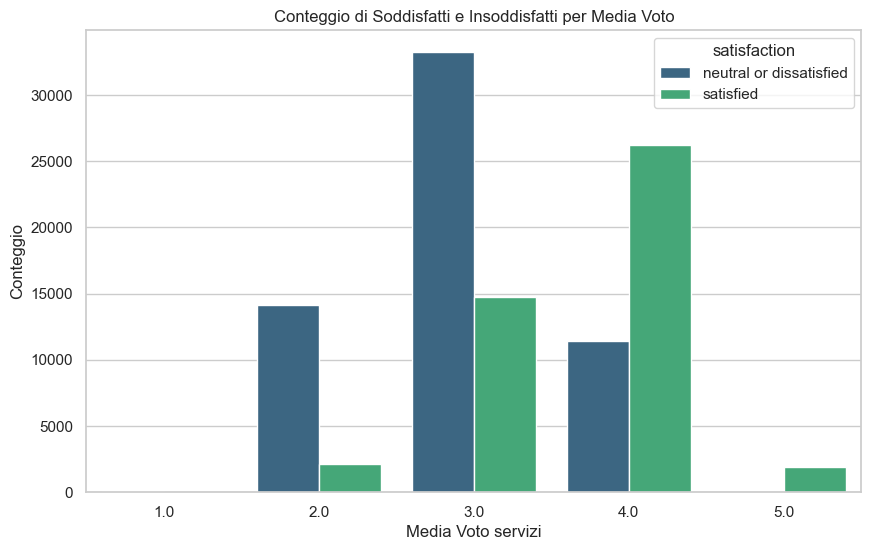

In [116]:
# Use the DataFrame df_grouped to create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='media_voto', y='count', hue='satisfaction',palette='viridis')

# Add labels to the axes and a title to the plot
plt.xlabel('Media Voto servizi')
plt.ylabel('Conteggio')
plt.title('Conteggio di Soddisfatti e Insoddisfatti per Media Voto')

# Show chart
plt.show()

In [117]:
df_train.groupby('Class')["media_voto"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
Business,49665.0,3.430001,0.742837,1.0,3.0,4.0,4.0,5.0
Eco,46745.0,3.068200,0.681354,1.0,3.0,3.0,4.0,5.0
Eco Plus,7494.0,3.064852,0.705026,1.0,3.0,3.0,4.0,5.0


In [118]:
df_train.groupby('Customer Type')["media_voto"].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Type,,,,,,,,
Loyal Customer,84923.0,3.284599,0.739150,1.0,3.0,3.0,4.0,5.0
disloyal Customer,18981.0,3.045361,0.686615,1.0,3.0,3.0,3.0,5.0


In [119]:
grouped_df2 = df_train.groupby(["satisfaction","Class","media_voto"])["count"].sum().reset_index()

C:\Users\worme\AppData\Local\Temp\ipykernel_4104\1577420707.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


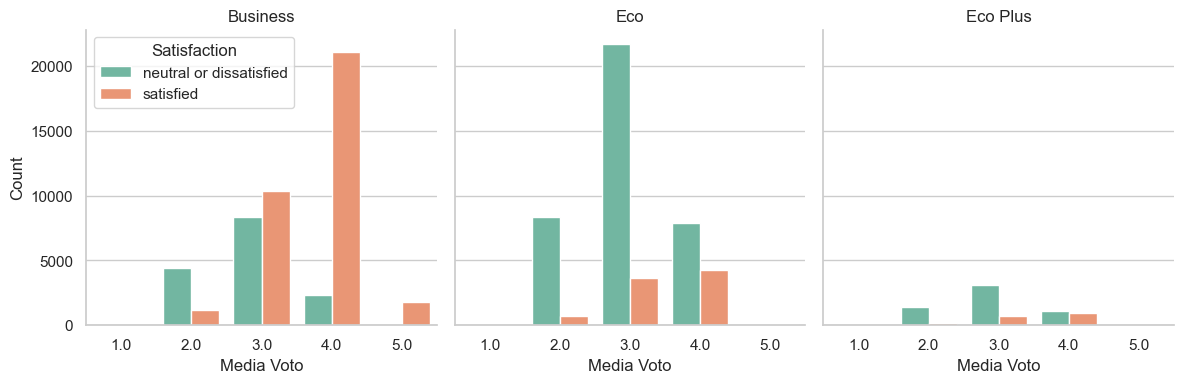

In [120]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=grouped_df2,
    x="media_voto",
    y="count",
    hue="satisfaction",
    col="Class",
    kind="bar",
    height=4,
    aspect=1,
    ci=None,
    estimator=sum,
    legend_out=False,
    palette="Set2"
)

g.set_axis_labels("Media Voto", "Count")
g.set_titles("{col_name}")
g.add_legend(title="Satisfaction")
plt.show()

In [121]:
# Create a new empty DataFrame to store the counts
conteggi_colonne = pd.DataFrame(columns=["Colonna"])

# Iterate through the columns and calculate the vote counts
for colonna in colonne_numeriche:
    conteggio_voti = df_train[colonna].value_counts()
    conteggio_voti["Colonna"] = colonna
    conteggi_colonne = conteggi_colonne.append(conteggio_voti, ignore_index=True)

C:\Users\worme\AppData\Local\Temp\ipykernel_4104\3099788933.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conteggi_colonne = conteggi_colonne.append(conteggio_voti, ignore_index=True)
C:\Users\worme\AppData\Local\Temp\ipykernel_4104\3099788933.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conteggi_colonne = conteggi_colonne.append(conteggio_voti, ignore_index=True)
C:\Users\worme\AppData\Local\Temp\ipykernel_4104\3099788933.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conteggi_colonne = conteggi_colonne.append(conteggio_voti, ignore_index=True)
C:\Users\worme\AppData\Local\Temp\ipykernel_4104\3099788933.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

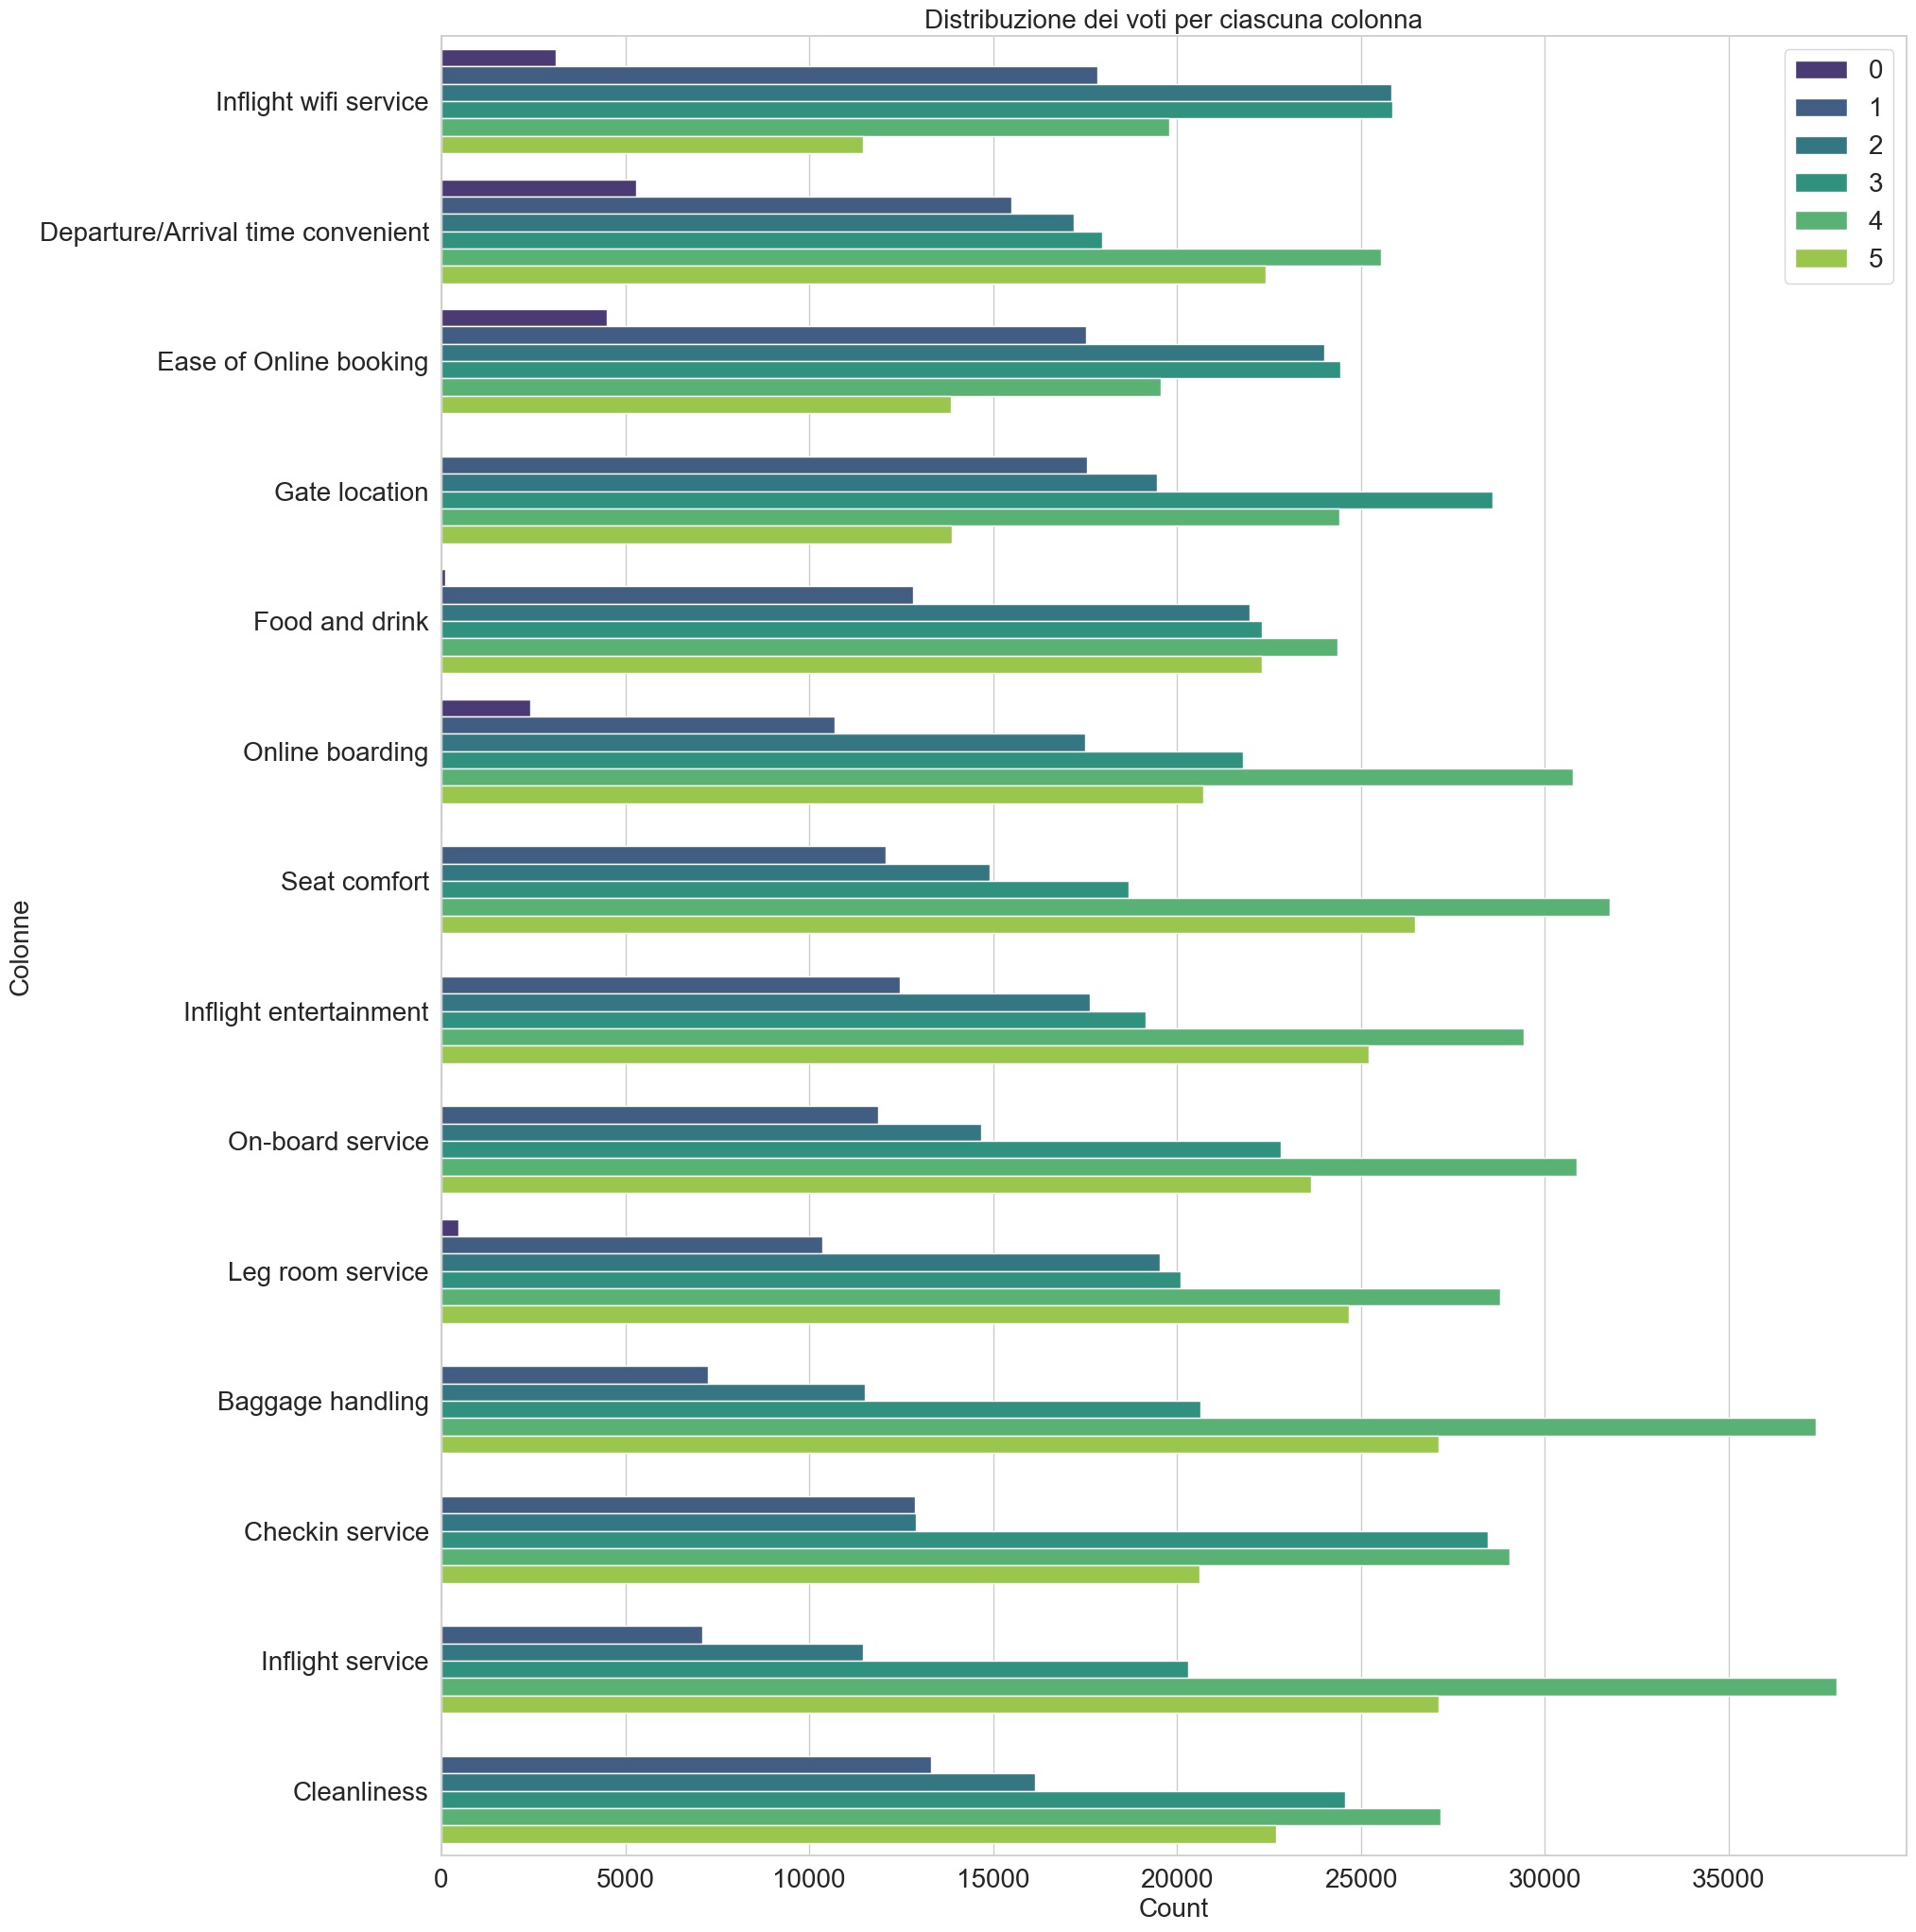

In [122]:
# Transform the DataFrame into a suitable format for the plot
conteggi_colonne_melted = conteggi_colonne.melt(id_vars=["Colonna"], var_name="Voto", value_name="Count")

# Set figure size
plt.figure(figsize=(20, 25))

# Create a horizontal bar plot
g = sns.barplot(data=conteggi_colonne_melted, x='Count', y='Colonna', hue='Voto',palette='viridis')

# Set title and axis labels
plt.title('Distribuzione dei voti per ciascuna colonna',fontsize=20)
plt.xlabel('Count',fontsize=20)
plt.ylabel('Colonne',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
# Show chart
plt.show()

<Axes: xlabel='satisfaction'>

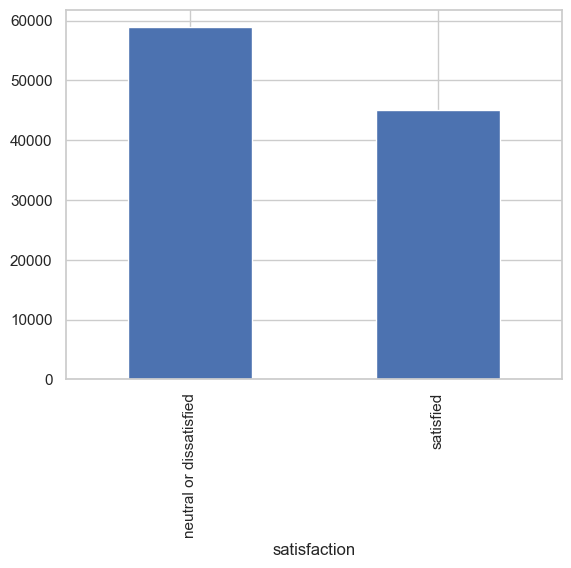

In [123]:
df_train.value_counts("satisfaction").plot(kind="bar")

In [124]:
df_train.value_counts("Class")

Class
Business    49665
Eco         46745
Eco Plus     7494
dtype: int64

# Pipeline creation and Preprocessing

In [125]:
df_train.drop(["id","Gender"],axis=1,inplace=True)

In [126]:
X_train = df_train.drop(["Age_bin","media_voto","count","satisfaction"],axis=1)
y_train = df_train["satisfaction"]


In [127]:
X_train.shape

(103904, 20)

In [128]:
y_train

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

In [129]:
y_train.replace({'neutral or dissatisfied':0,'satisfied':1},inplace=True)

### The models that will be used are "Random Forest, Logistic Regression, and Support Vector Machines"

In [130]:
pre_1 = ColumnTransformer([
    ('categoriche',OneHotEncoder(sparse_output=False),['Customer Type','Type of Travel']),
    ('ordinale',OrdinalEncoder(categories=[['Eco','Eco Plus','Business']]),['Class']),
    
], remainder='passthrough')

In [131]:
pre_1.fit_transform(X_train).shape

(103904, 22)

In [132]:
pre_2 = ColumnTransformer([
    ('categoriche',OneHotEncoder(sparse_output=False),['Customer Type','Type of Travel']),
    ('ordinale',make_pipeline(OrdinalEncoder(categories=[['Eco','Eco Plus','Business']]), StandardScaler()),['Class']),
    ('numeriche',StandardScaler(),X_train.drop(['Customer Type','Type of Travel','Class'],axis=1).columns)
])

In [133]:
pre_2.fit_transform(X_train)

array([[ 1.        ,  0.        ,  0.        , ...,  1.15643582,
         1.30586973,  0.26639265],
       [ 0.        ,  1.        ,  1.        , ...,  0.30584786,
        -1.74229153, -0.36137482],
       [ 1.        ,  0.        ,  1.        , ...,  0.30584786,
         1.30586973, -0.3875318 ],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  1.15643582,
         0.54382941, -0.20443295],
       [ 0.        ,  1.        ,  1.        , ...,  0.30584786,
        -1.74229153, -0.3875318 ],
       [ 1.        ,  0.        ,  1.        , ..., -0.54474009,
        -1.74229153, -0.3875318 ]])

In [134]:
# Logistic

logistic = make_pipeline(pre_2, LogisticRegression(max_iter=5000))

In [135]:
logistic.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categoriche',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Customer Type',
                                                   'Type of Travel']),
                                                 ('ordinale',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Eco',
                                                                                               'Eco '
                                                                                               'Plus',
                                                                                               'Business']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Class']),
                                                 ('numeriche', StandardScaler(),
                                                  Index(['Age'...',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression(max_iter=5000))])

In [136]:
search = GridSearchCV(logistic, {'logisticregression__C':np.arange(0.1,3,0.05)},cv=5, scoring='recall',n_jobs=-1, verbose=3)
#'logisticregression__C': Inverse regularization parameter (C) for logistic regression

In [137]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 58 candidates, totalling 290 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categoriche',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel']),
                                                                        ('ordinale',
                                                                         Pipeline(steps=[('ordinalencoder',
                                                                                          OrdinalEncoder(categories=[['Eco',
                                                                                                                      'Eco '
                                                                                                                      'Plus',
                                                                                                                      'Business']])),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Class']),
                                                                        ('numeri...
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15,
       1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 ,
       1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25,
       2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 ,
       2.85, 2.9 , 2.95])},
             scoring='recall', verbose=3)

In [138]:
search.best_score_

0.8355580233203777

In [139]:
# Random Forest

rf =  make_pipeline(pre_1,RandomForestClassifier(random_state=0, n_jobs=-1))

In [140]:
search_2 = GridSearchCV(rf, param_grid={
                            'randomforestclassifier__n_estimators':[10,50,100],# Number of trees 
                             'randomforestclassifier__max_samples':[0.5,1],# Fraction of samples to train each tree
                            'randomforestclassifier__max_features':[0.5,1]# Fraction of features to find the best split
                            },cv=5, scoring='recall',n_jobs=-1, verbose=3)

In [141]:
search_2.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categoriche',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel']),
                                                                        ('ordinale',
                                                                         OrdinalEncoder(categories=[['Eco',
                                                                                                     'Eco '
                                                                                                     'Plus',
                                                                                                     'Business']]),
                                                                         ['Class'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_features': [0.5, 1],
                         'randomforestclassifier__max_samples': [0.5, 1],
                         'randomforestclassifier__n_estimators': [10, 50, 100]},
             scoring='recall', verbose=3)

In [142]:
search_2.best_score_

0.9405663520266518

In [143]:
# SVM

svm = make_pipeline(pre_2,LinearSVC(random_state=0, max_iter=5000))
# max_iter: Maximum number of iterations

In [144]:
search_3 = GridSearchCV(svm, {'linearsvc__C':np.arange(0.1,2,0.1)},cv=5, scoring='recall',n_jobs=-1, verbose=3)
# 'linearsvc__C': Regularization parameter (C) for the linear support vector classifier

In [145]:
search_3.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


C:\Users\worme\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categoriche',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel']),
                                                                        ('ordinale',
                                                                         Pipeline(steps=[('ordinalencoder',
                                                                                          OrdinalEncoder(categories=[['Eco',
                                                                                                                      'Eco '
                                                                                                                      'Plus',
                                                                                                                      'Business']])),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Class']),
                                                                        ('numeri...
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes'],
      dtype='object'))])),
                                       ('linearsvc',
                                        LinearSVC(max_iter=5000,
                                                  random_state=0))]),
             n_jobs=-1,
             param_grid={'linearsvc__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
             scoring='recall', verbose=3)

In [146]:
search_3.best_score_

0.8329150471960023

#### The best model obtained during the training phase was the one based on Random Forest

# Preprocessing and Predict + Score Calculation for the Test Section

In [147]:
df_test[df_test.isna().any(axis=1)]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,107365,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,1,4,2,1,4,2,4,2,5,4,5,2,9,NaN,neutral or dissatisfied
656,108648,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,2,2,4,2,1,4,2,5,2,5,2,4,51,NaN,neutral or dissatisfied
1071,16797,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,4,5,5,4,5,5,2,5,2,3,2,5,126,NaN,neutral or dissatisfied
1224,30090,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,4,4,4,4,4,4,4,3,1,1,4,4,0,NaN,neutral or dissatisfied
1589,41924,Female,Loyal Customer,58,Business travel,Eco,129,5,3,3,3,3,5,5,5,5,5,5,3,5,5,3,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24072,21780,Male,Loyal Customer,45,Business travel,Eco,352,5,1,1,1,5,5,5,5,1,1,1,3,2,5,26,NaN,satisfied
24133,64934,Female,Loyal Customer,29,Business travel,Business,3873,3,3,3,3,3,3,3,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
24301,125688,Male,disloyal Customer,38,Business travel,Business,759,3,3,3,1,4,3,4,4,3,3,5,5,4,4,0,NaN,satisfied
25128,64706,Female,Loyal Customer,52,Business travel,Business,3659,5,5,5,5,2,4,5,5,5,5,5,3,5,3,0,NaN,satisfied


In [148]:
X_test = df_test.drop(["id","Gender","Arrival Delay in Minutes"],axis=1)
y_test = df_test["satisfaction"]

In [149]:
y_test.replace({'neutral or dissatisfied':0,'satisfied':1},inplace=True)

In [150]:
pre_1.transform(X_test).shape

(25976, 22)

## Random Forest

In [151]:
y_pred_rf = search_2.predict(X_test)

In [152]:
recall_rf = recall_score(y_test, y_pred_rf)

print("Recall Score:", recall_rf)

Recall Score: 0.9427343681487328


In [153]:
print("Recall score su training:", recall_score(y_train, search_2.predict(X_train)))

Recall score su training: 0.9852748473070516


In [154]:
# We can therefore infer a good generalization capacity of the Random Forest model

In [155]:
pre_2.transform(X_test)

array([[ 1.        ,  0.        ,  1.        , ...,  1.15643582,
         1.30586973,  0.92031709],
       [ 1.        ,  0.        ,  1.        , ...,  0.30584786,
         1.30586973, -0.3875318 ],
       [ 0.        ,  1.        ,  1.        , ..., -1.39532804,
        -0.98025121, -0.3875318 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.30584786,
        -0.98025121, -0.3875318 ],
       [ 1.        ,  0.        ,  1.        , ...,  1.15643582,
         0.54382941, -0.3875318 ],
       [ 1.        ,  0.        ,  0.        , ..., -2.24591599,
        -1.74229153, -0.3875318 ]])

## Svm

In [156]:
y_pred_svm = search_3.predict(X_test)
recall_svm = recall_score(y_test, y_pred_svm)

print("Recall Score:", recall_svm)

Recall Score: 0.8300447250723494


## Logistic Regression

In [157]:
y_pred_lr = search.predict(X_test)
recall_lr = recall_score(y_test, y_pred_lr)

print("Recall Score:", recall_lr)

Recall Score: 0.8330263965623081


# Analisi di importanza delle variabili secondo la Random Forest

In [158]:
search_2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categoriche',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel']),
                                                                        ('ordinale',
                                                                         OrdinalEncoder(categories=[['Eco',
                                                                                                     'Eco '
                                                                                                     'Plus',
                                                                                                     'Business']]),
                                                                         ['Class'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_features': [0.5, 1],
                         'randomforestclassifier__max_samples': [0.5, 1],
                         'randomforestclassifier__n_estimators': [10, 50, 100]},
             scoring='recall', verbose=3)

In [159]:
o = search_2.best_estimator_[0]

In [160]:
features_names = [x.split("__")[1] for x in o.get_feature_names_out()]

In [161]:
importances = search_2.best_estimator_[-1].feature_importances_

In [162]:
importances

array([0.02465688, 0.0246557 , 0.08296631, 0.05733247, 0.05817415,
       0.02646923, 0.02626479, 0.15624206, 0.00939379, 0.02610177,
       0.01457844, 0.00653848, 0.26571498, 0.02694589, 0.05535996,
       0.02232481, 0.01947932, 0.02100425, 0.02485365, 0.02329313,
       0.01634668, 0.01130327])

In [163]:
importances.sum()

1.0

<Axes: >

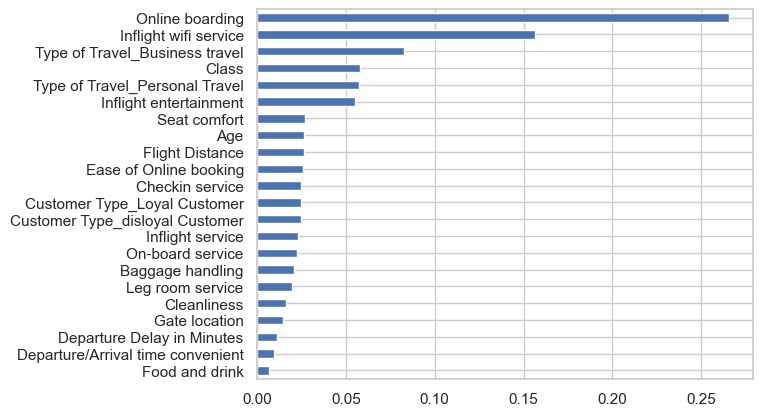

In [164]:
pd.Series(index=features_names, data=importances).sort_values().plot(kind='barh')

In [165]:
importances.mean()

0.045454545454545456

## Features with greater relevance according to the best Random Forest model

<Axes: >

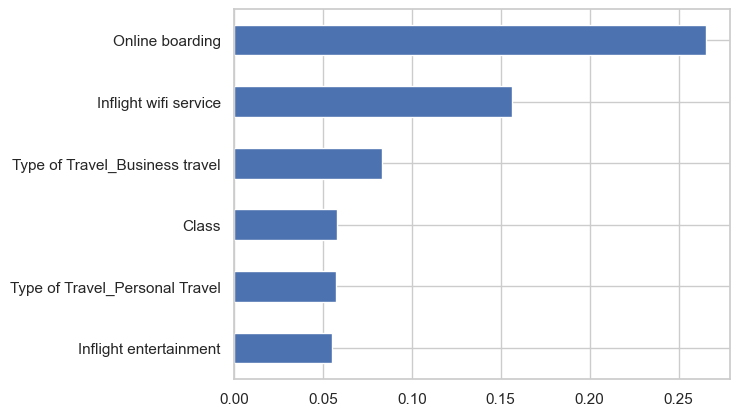

In [166]:
s = pd.Series(index=features_names, data=importances).sort_values()
s[s > s.mean()].plot(kind='barh')